In [ ]:
%matplotlib inline

# Tutorial 2: How to use the Pytorch to train the neural networks for classification?

## What is the classfication problem?

A classification problem involves predicting whether something is one thing or another. For example,

| Problem type               | What is it?                                      | Example                                                                                                     |
| -------------------------- | ------------------------------------------------ | ----------------------------------------------------------------------------------------------------------- |
| Binary classification      | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters.                          |
| Multi-class classification | Target can be one of more than two options       | Decide whether a photo of is of food, a person or a dog.                                                    |
| Multi-label classification | Target can be assigned more than one option      | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy). |


In this tutorial, we're going to work through the multi-class classification classification problem with PyTorch.

## What is the data format commonly used for classification?

Generally, there are **image**, **text**, **audio** or **video** data.

We can use standard python packages that load data into a **``numpy array``**, and then convert this array into a **``torch.Tensor``**.

-  For images, packages such as Pillow, OpenCV
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy

Specifically for vision, we have created a package called
**``torchvision``**, that has data loaders for common datasets such as
ImageNet, CIFAR10, MNIST, etc. and data transformers for images, such as,
**``torchvision.datasets``** and **``torch.utils.data.DataLoader``**.


In this tutorial, we will use the **CIFAR10** dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.




## The workflow of training an image classifier using pytorch


1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function and optimizer
4. Train the network on the training data
5. Test the network on the test data


### Import the related packages

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms

### 1. Load and normalize CIFAR10

torchvision.datasets.CIFAR10 [Cource Code](https://pytorch.org/vision/stable/_modules/torchvision/datasets/cifar.html#CIFAR10)


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].


In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Show some of the training images for verification!



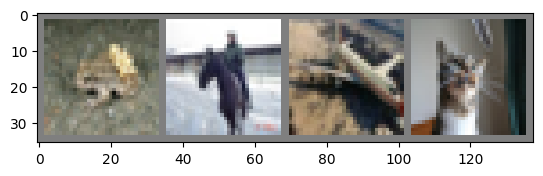

frog  horse plane cat  


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### 2. Define a Convolutional Neural Network
The neural network should satisfy the inputs with 3-dimension.



In [22]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # import pdb
        # pdb.set_trace()
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 3. Define a Loss function and optimizer



In [23]:
import torch.optim as optim


# SGD with momentum.
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# You can also use the Adam optimizer.
# optimizer = optim.Adam([var1, var2], lr=0.001)


# 定义学习率调度器
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# 更新学习率
# scheduler.step()

### 4. Train the network

Here, we have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [24]:
import matplotlib.pyplot as plt

# Classification Cross-Entropy loss 
criterion = nn.CrossEntropyLoss()

losses = []

for epoch in range(2):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        if i % 2000 == 0:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {loss:.3f}')
            losses.append(loss.item())

print('Finished Training')

[1,     1] loss: 2.286
[1,  2001] loss: 2.091
[1,  4001] loss: 1.747
[1,  6001] loss: 1.431
[1,  8001] loss: 1.637
[1, 10001] loss: 1.620
[1, 12001] loss: 1.018
[2,     1] loss: 1.035
[2,  2001] loss: 1.051
[2,  4001] loss: 1.663
[2,  6001] loss: 1.609
[2,  8001] loss: 0.938
[2, 10001] loss: 1.332
[2, 12001] loss: 0.877
Finished Training


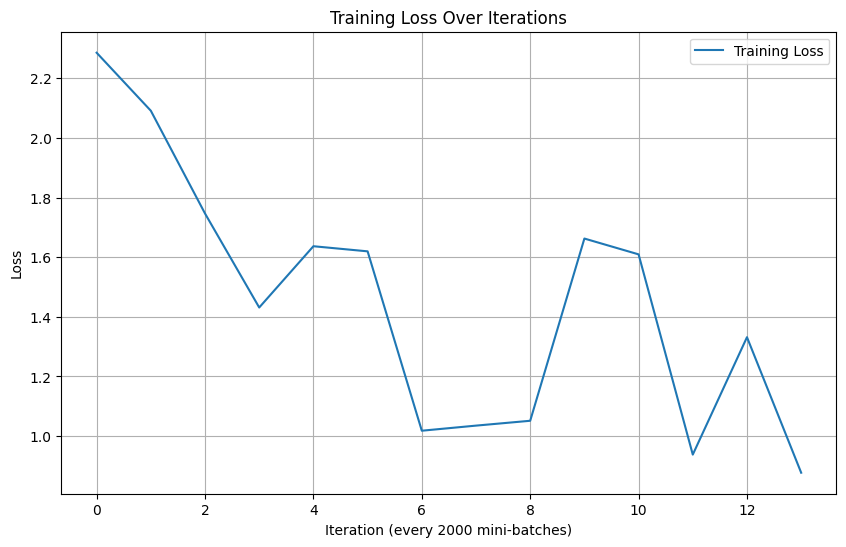

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.xlabel('Iteration (every 2000 mini-batches)')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

Let's quickly save our trained model:



In [ ]:
PATH = './cifar_net.pth'
print(net.state_dict())
torch.save(net.state_dict(), PATH)

### 5. Test the network on the test data

**We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.**

Generally, we will use the val/test datasets to evaluation the trained model.

Again, show some of the testing images!





In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Load our saved model



In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

Let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images)
# print(outputs)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

How the network performs on the whole testing dataset?



In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

How the network performs on the whole testing dataset to each class?



In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')



## Training on GPU
How to transfer a Tensor and the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:



In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

    inputs, labels = data[0].to(device), data[1].to(device)



In [ ]:
del dataiter